Here we analyse the imprint of the low-velocity zone (LVZ) recovered by FWI in the seismic waveforms. Based on Fig. 3 of Paulatto et al. (Frontiers, in review), we expect a slight delay of travel time of the first arrival close to the LVZ and secondary arrivals modulating the waveforms in the inverted time window.

To test this, we first analyse two synthetic datasets calculated respectively from:
1. starting model.
2. starting model perturbed with a spherical anomaly of a similar size to the one recovered by FWI.

Calculation of the 1. dataset can be found in `Synthetic-data_calculation.ipynb` notebook. The 2. dataset was calculated in `Spike_tests.ipynb`. Here we compare them by interleaving subsets of the respective OBS-gathers. We also compare single traces.

We then look at the portion of the field dataset (first introduced in `Field_data.ipynb`) where the imprint of the LVZ is expected based on the above. Due to the low S/N ratio this imprint is not immediately visible in the inverted time window.

However, comparing the field dataset to 1. and 2. synthetic dataset, one at a time, reveals that the 2. dataset better fits the field traces.

#### Notebook config

In [ ]:
%load_ext autoreload

In [11]:
%autoreload 2

In [16]:
import fwipy 
from fwipy import *
from fwipy.config.logging import *
from fwipy.ioapi.segy import SgyFile

In [13]:
help(fwipy)

Help on package fwipy:

NAME
    fwipy

PACKAGE CONTENTS
    config (package)
    dsp (package)
    fd (package)
    fwi (package)
    generic (package)
    ioapi (package)
    ndat (package)
    numeric (package)
    plot (package)
    project (package)
    seismic (package)
    utils

FILE
    /home/kajetan/software/Kolumbo-FWI/fwipy/__init__.py




# Field data

In [28]:
# read IDs
file_name = 'method_s01-Synthetic.sgy'
data_path = '../data/'
sgy = SgyFile(file_name, data_path)
OBS_ids = sorted(sgy.read_header().tracf.unique())
print(OBS_ids)
shot_line_ids = sorted(sgy.head.ep.unique())
print(shot_line_ids)

[4104, 4105, 4109, 4110, 4112, 4123, 4124, 4125, 4137, 4138, 4139, 4157, 4158, 4176, 4177, 4178]
[5, 6, 7, 8, 9, 10, 22, 23, 26, 27, 30, 31, 37, 38]


In [30]:
file_name = 'method_s01-OutSeis.sgy'
data_path = '../data/'

from fullwavepy.seismic.data import DataFileSgy
kw_filt = {'pad': 100, 'f1': 2, 'f2': 3, 'f3': 4.5, 'f4': 6.5, 'zerophase': False}
f = DataFileSgy(file_name, data_path)

In [31]:
# %%time 
# DON'T RE-RUN IT BY ANY MEANS!
# f.filt(dt=0.0025,  **kw_filt)

INFO:fullwavepy.ioapi.segy.SgyFile.filt: Using 100 samples of padding
INFO:fullwavepy.ioapi.segy.SgyFile.filt: Setting dt in the header of: ../data//method_s01-OutSeis.sgy
INFO:fullwavepy.dsp.su.su_taper: dt_ms2.5
INFO:fullwavepy.dsp.su.su_taper: tbeg 250.0, tend 250.0


INFO:fullwavepy.ioapi.segy.SgyFile.filt: Filtered data output to ../data//method_s01-OutSeis_taper_pad_filt_trim.sgy


CPU times: user 117 ms, sys: 137 ms, total: 254 ms
Wall time: 55.3 s


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


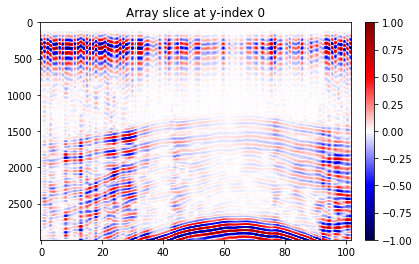

In [34]:
f.plot(win=dict(tracf=[4104],ep=[8]), overwrite=1,norm='max')

# Synthetics
From the starting model.

In [40]:
file_name = 'method_s01-Synthetic.sgy'
data_path = '../data/'
sgy = SgyFile(file_name, data_path)
sgy1 = sgy
# OBS_ids = sorted(sgy.read_header().tracf.unique())
# print(OBS_ids)

# shot_line_ids = sorted(sgy.head.ep.unique())
# print(shot_line_ids)

In [79]:
%%time 
ds01 = {}
for obsid in OBS_ids:
    ds01[obsid] = {}
    for lid in shot_line_ids:
        ds01[obsid][lid] = sgy.read(win=dict(tracf=[obsid],ep=[lid]), overwrite=0,norm='max')

INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.
CPU times: user 3.34 s, sys: 19.4 s, total: 22.8 s
Wall time: 7min 43s


<AxesSubplot:title={'center':'Array slice at y-index 0'}>

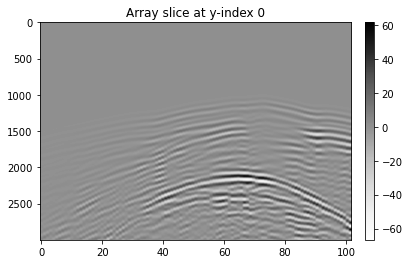

In [80]:
ds01[4104][7].plot()

# Synthetics
From the starting model perturbed with fwhm800 50% anomaly.

In [41]:
file_name = 'method_s01_800_50-Synthetic.sgy'
data_path = '../data/'
sgy8 = SgyFile(file_name, data_path)

<AxesSubplot:title={'center':'Array slice at y-index 0'}>

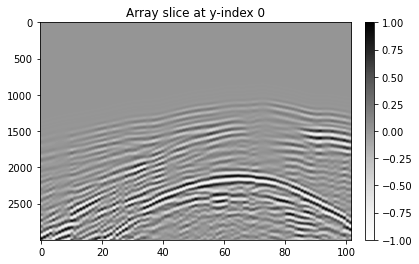

In [39]:
lll(40)
sgysp.plot(win=dict(tracf=[4104],ep=[7]), overwrite=0,norm='max')

# Compare

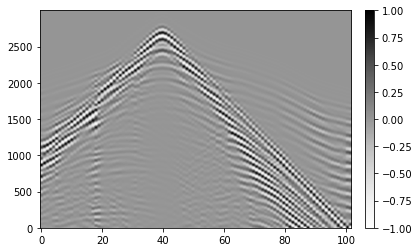

In [72]:
tracf, ep = 4138, 8
d1 = sgy1.read(win=dict(tracf=[tracf],ep=[ep]), overwrite=0,norm='max')
d8 = sgy8.read(win=dict(tracf=[tracf],ep=[ep]), overwrite=0,norm='max')
d1.compare(d8, norm='max')

(0.0, 500.0)

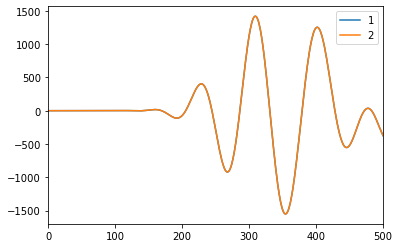

In [75]:
# plot 
trid = 40
plt.plot(d1[trid,0], label='1')
plt.plot(d8[trid,0], label='2')
plt.legend()
plt.xlim(0,500)

# DumpCompare

In [76]:
path = '../data/projects/'
geom = {'box': [8000.0, 25000.0, -3000.0, 15000.0, 0, 4000.0],
 'dt': 0.0025,
 'dx': 50,
 'ns': 2000}
p14 = ProjInv('p14', path=path, cat=0, **geom)
p = p14

In [84]:
dc = p.o.dc.it[1][4105].read()

In [87]:
dc['syn'].shape

(1037, 1, 2000)

In [83]:
p.o.dc.it[1][4105].read_header()

,tracl,tracr,fldr,tracf,ep,cdpt,offset,gelev,selev,sdepth,...,gain,igc,year,day,hour,minute,sec,timbas,ntr,offset3d
0,3610,12062,17622,4105,5,1,5159,-399,-12,12,...,0,0,2015,331,4,28,51,65,19296,5175.262988
1,3611,12063,17623,4105,5,1,5324,-399,-12,12,...,0,0,2015,331,4,30,20,110,19296,5339.750650
2,3612,12064,17624,4105,5,1,5488,-399,-12,12,...,0,0,2015,331,4,31,48,570,19296,5504.084847
3,3613,12065,17625,4105,5,1,5653,-399,-12,12,...,0,0,2015,331,4,33,16,900,19296,5668.600974
4,3614,12066,17626,4105,5,1,5818,-399,-12,12,...,0,0,2015,331,4,34,44,900,19296,5832.112996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,13311,13287,42762,4105,38,1,5744,-399,-12,12,...,0,0,2015,340,14,3,33,189,19296,5759.166780
1033,13312,13288,42763,4105,38,1,5580,-399,-12,12,...,0,0,2015,340,14,4,49,419,19296,5595.699241
1034,13313,13289,42764,4105,38,1,5415,-399,-12,12,...,0,0,2015,340,14,6,5,484,19296,5431.230616
1035,13314,13290,42765,4105,38,1,5250,-399,-12,12,...,0,0,2015,340,14,7,21,374,19296,5266.720612


In [93]:
# data match
def interlace_syn_obs(p, it, sid, lid):
    log_lvl(40)
    dc = p.o.dc

    f = dc.it[it][sid]
    f.split(overwrite=0)

    figure(15,5)
    plt.suptitle('Interleaved syn and obs data (10xsyn, 10xobs, 10xsyn,...)')

    args = [f.obs.lid[lid]]
    kwargs = dict(norm='max', overwrite=0)
    def set_ticks(c):
        chunk_size = 10
        ti = np.arange(len(f.syn.lid[lid]))[::chunk_size] - .5       
        plt.gca().set_xticks(ti)
        plt.gca().grid(axis='x', c=c, linestyle='-.', linewidth=2)           

    plt.subplot(121)
    f.syn.lid[lid].compare(*args, **kwargs, noextent=1)
    set_ticks('k')


    plt.subplot(122)
    f.syn.lid[lid].compare(*args, **kwargs, spect='ampl', dt=p.dt, cmap='hot', center_cmap=0)   
    plt.ylim(10,0)
    set_ticks('Grey')   

### 4105

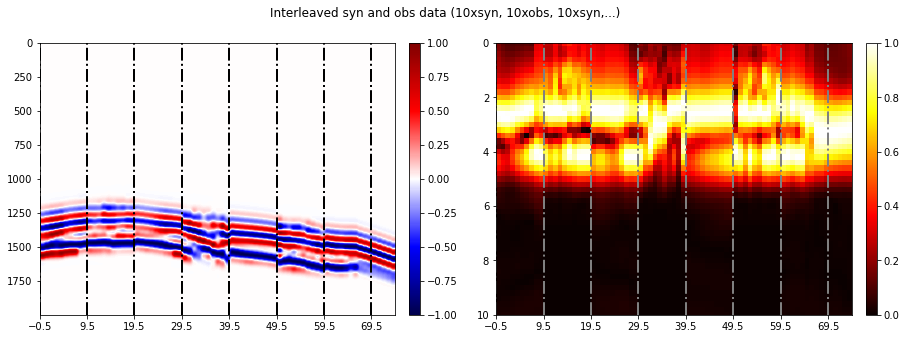

In [94]:
interlace_syn_obs(p, it=1, sid=4105, lid=7)

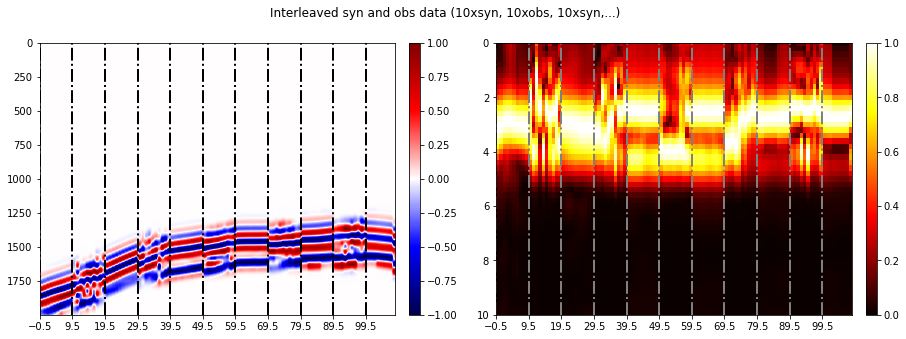

In [95]:
interlace_syn_obs(p, it=1, sid=4105, lid=27)

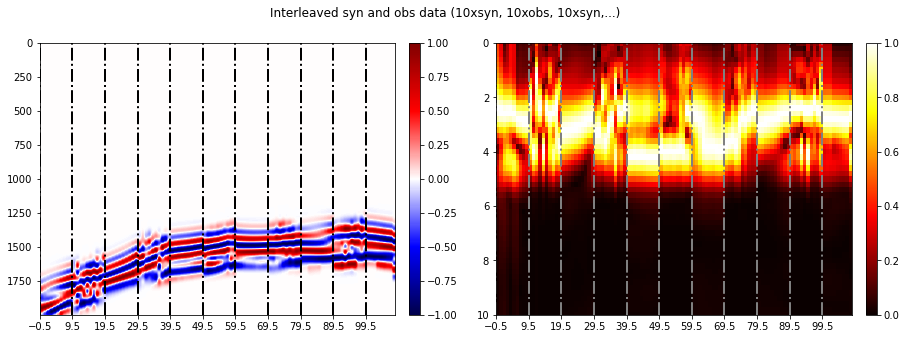

In [98]:
interlace_syn_obs(p, it=20, sid=4105, lid=27)

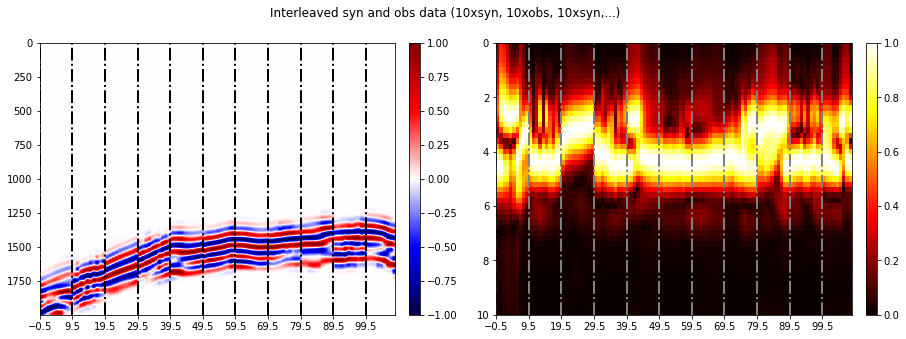

In [100]:
interlace_syn_obs(p, it=80, sid=4105, lid=27)

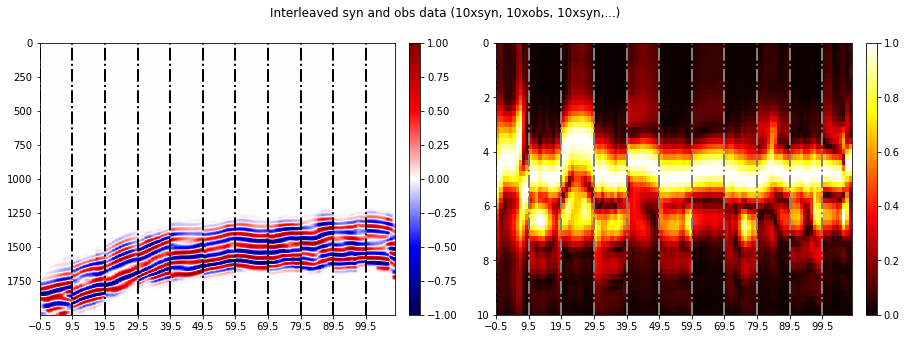

In [102]:
interlace_syn_obs(p, it=160, sid=4105, lid=27)

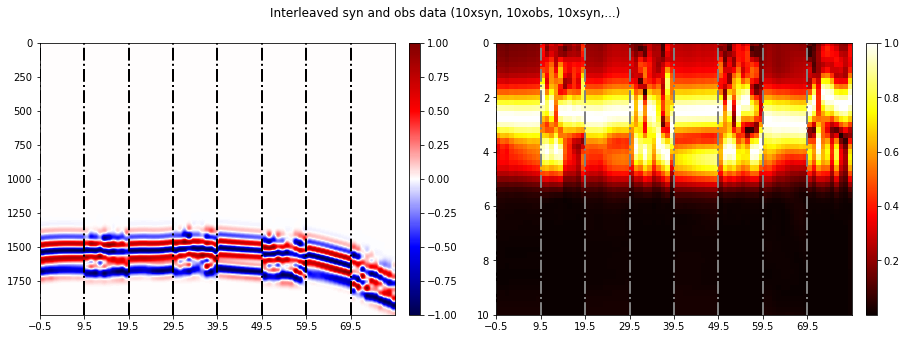

In [96]:
interlace_syn_obs(p, it=1, sid=4105, lid=8)

### All

In [116]:
%%time 
lll(40)
for it in [1,20,80,160]:
    for sid in OBS_ids:
        for lid in shot_line_ids:
            try:
                interlace_syn_obs(p, it=it, sid=sid, lid=lid)
            except AssertionError:
                print('WARNING no data for OBS %s, line %s' % (sid, lid))
            plt.savefig('figures/interlaced/p14_OBS%s_line%s_it%s.png' % (sid, str(lid).rjust(3, '0'), str(it).rjust(3, '0')))
            plt.close()

WARNING no data for OBS 4137, line 23


/home/kajetan/software/fullwavepy/fullwavepy/project/files/datalike/ttr.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['offset3d'] = np.sqrt((df['sx'] - df['gx'])**2 +
/home/kajetan/software/fullwavepy/fullwavepy/project/files/datalike/ttr.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['offset3d'] = np.sqrt((df['sx'] - df['gx'])**2 +
/home/kajetan/software/fullwavepy/fullwavepy/project/files/datalike/ttr.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

WARNING no data for OBS 4137, line 23


/home/kajetan/software/fullwavepy/fullwavepy/project/files/datalike/ttr.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['offset3d'] = np.sqrt((df['sx'] - df['gx'])**2 +
/home/kajetan/software/fullwavepy/fullwavepy/project/files/datalike/ttr.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['offset3d'] = np.sqrt((df['sx'] - df['gx'])**2 +
/home/kajetan/software/fullwavepy/fullwavepy/project/files/datalike/ttr.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

WARNING no data for OBS 4137, line 23


/home/kajetan/software/fullwavepy/fullwavepy/project/files/datalike/ttr.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['offset3d'] = np.sqrt((df['sx'] - df['gx'])**2 +
/home/kajetan/software/fullwavepy/fullwavepy/project/files/datalike/ttr.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['offset3d'] = np.sqrt((df['sx'] - df['gx'])**2 +
/home/kajetan/software/fullwavepy/fullwavepy/project/files/datalike/ttr.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

WARNING no data for OBS 4137, line 23


/home/kajetan/software/fullwavepy/fullwavepy/project/files/datalike/ttr.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['offset3d'] = np.sqrt((df['sx'] - df['gx'])**2 +
/home/kajetan/software/fullwavepy/fullwavepy/project/files/datalike/ttr.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['offset3d'] = np.sqrt((df['sx'] - df['gx'])**2 +
/home/kajetan/software/fullwavepy/fullwavepy/project/files/datalike/ttr.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

OSError: Conversion ttr2vtr raised: Truncated stderr (first 150 chars):At line 47 of file convert_ttr2vtr_IMPROVED.f90 (unit = 10, file = 'p14-SLAVES_DUMPCOMPARE-csref04158-iter00160fwd1.ttr')
Fortran runtime error: Unfor...

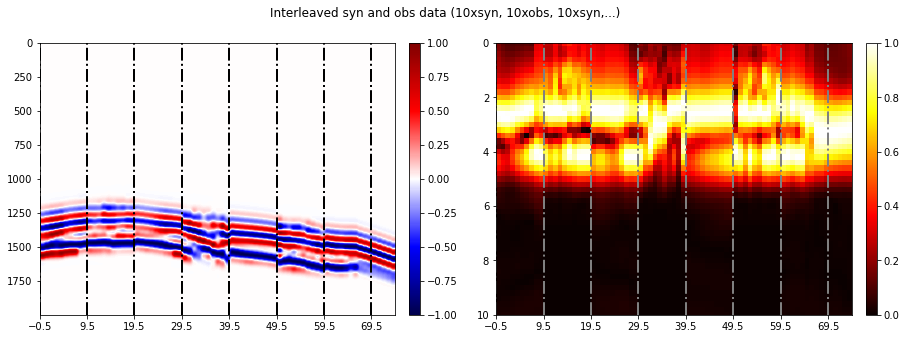

In [94]:
interlace_syn_obs(p, it=1, sid=4105, lid=7)

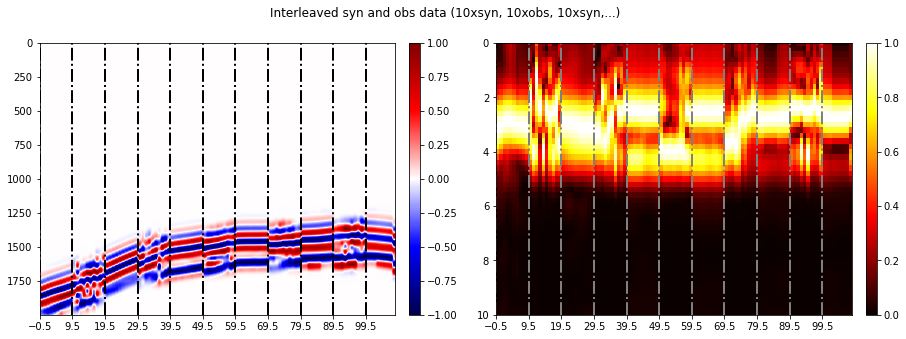

In [95]:
interlace_syn_obs(p, it=1, sid=4105, lid=27)

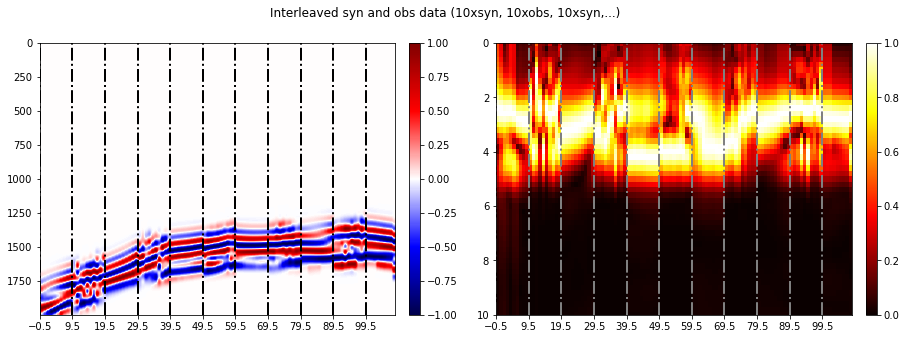

In [98]:
interlace_syn_obs(p, it=20, sid=4105, lid=27)

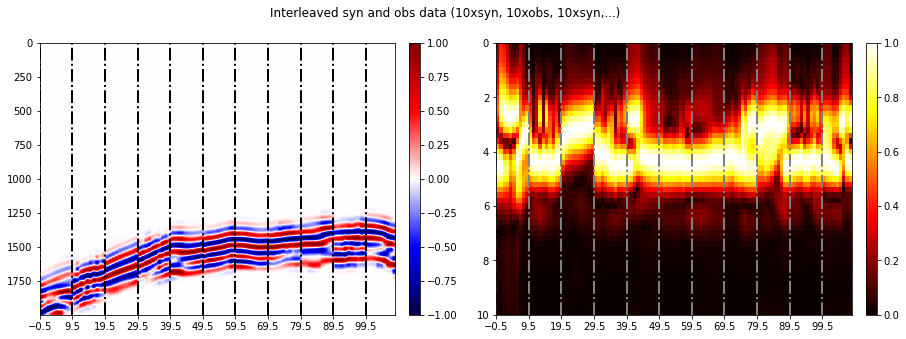

In [100]:
interlace_syn_obs(p, it=80, sid=4105, lid=27)

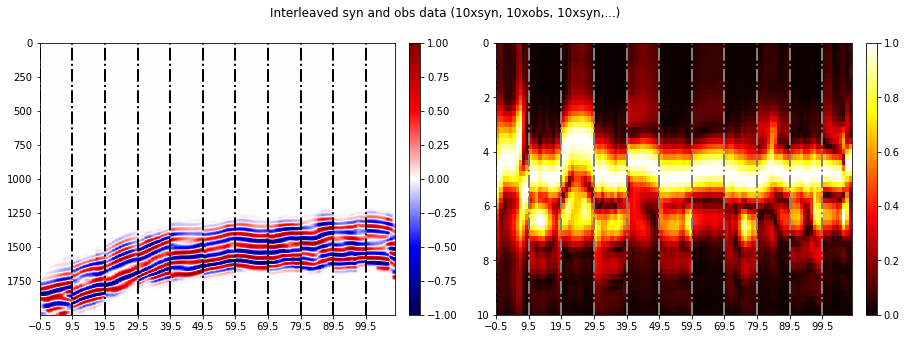

In [102]:
interlace_syn_obs(p, it=160, sid=4105, lid=27)

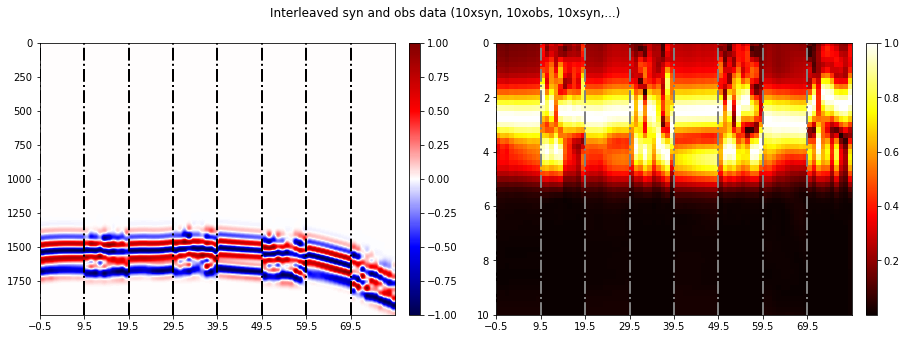

In [96]:
interlace_syn_obs(p, it=1, sid=4105, lid=8)

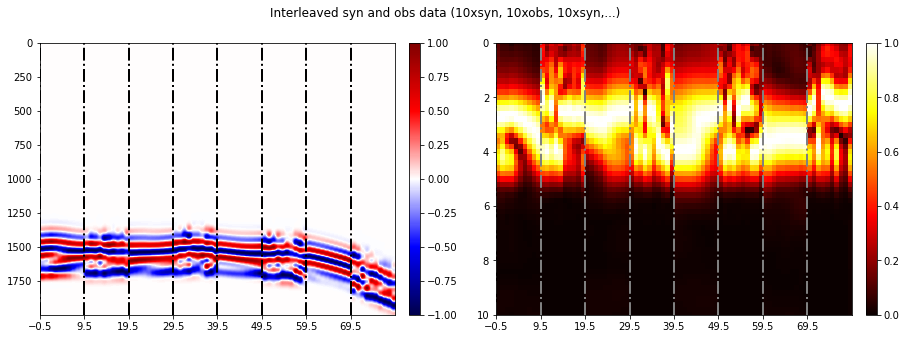

In [103]:
interlace_syn_obs(p, it=20, sid=4105, lid=8)

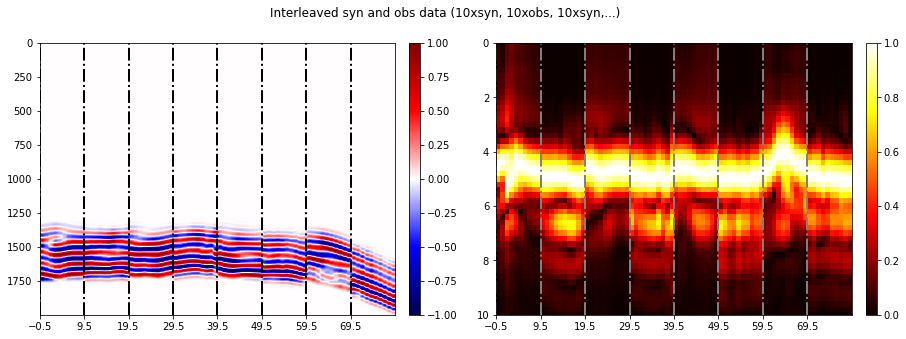

In [104]:
interlace_syn_obs(p, it=160, sid=4105, lid=8)

# Wiggle plots

In [ ]:
help(fwipy)

# Synthetics
Read all spikes. These data are restricted to offsets >5 km and cannot be compared directly with `method_s01`. Unfortunately, we cannot just copy in the `p14-Synthetic.sgy` as it is only 2000 samples long.

In [26]:
from fullwavepy import *
from fullwavepy.ioapi.segy import SgyFile

In [27]:
# get IDs 
data_path = '../data/'
# dat = Dat(dt=.0025, file=SgyFile('spike_fwhm1400_ampl050syn-Synthetic.sgy', data_path))
tracf = 4112
ep = 8
sgy = SgyFile('spike_fwhm1400_ampl050syn-Synthetic.sgy', data_path)
sgy.read(win=dict(tracf=[tracf], ep=[ep]), overwrite=1, norm='max')

OBS_ids = sorted(sgy.read_header().tracf.unique())
print(OBS_ids)

shot_line_ids = sorted(sgy.read_header().ep.unique())
print(shot_line_ids)

INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.
[4104, 4105, 4109, 4110, 4112, 4123, 4124, 4125, 4137, 4138, 4139, 4157, 4158, 4176, 4177, 4178]
[5, 6, 7, 8, 9, 10, 22, 23, 26, 27, 30, 31, 37, 38]


Read all shotline data into a handy data structure

In [47]:
%%time 
fwhms = [200, 1400]
ampls = [50]
OBS_ids = sorted(sgy.read_header().tracf.unique())
shot_line_ids = sorted(sgy.read_header().ep.unique())

data = {}
for fwhm in fwhms:
    data[fwhm] = {}
    fstr = str(fwhm).rjust(4, '0')
    for ampl in ampls:
        data[fwhm][ampl] = {}
        astr = str(ampl).rjust(3, '0')
        name = 'spike_fwhm{fwhm}_ampl{ampl}syn-Synthetic.sgy'.format(fwhm=fstr, ampl=astr)
        print(name)
        sgy = SgyFile(name, data_path)
        
        for obsid in OBS_ids:
            data[fwhm][ampl][obsid] = {}
            for lid in shot_line_ids:
                data[fwhm][ampl][obsid][lid] =  sgy.read(win=dict(tracf=[obsid], ep=[lid]),
                                                         overwrite=0, norm='max')
#                 break
#             break
#         break
#     break

spike_fwhm0200_ampl050syn-Synthetic.sgy
INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


spike_fwhm0800_ampl050syn-Synthetic.sgy
INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.
INFO:fullwavepy.ioapi.generic.read_any: Saving ../data//spike_fwhm0800_ampl050syn-Synthetic_windowed.mmp...


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


spike_fwhm1400_ampl050syn-Synthetic.sgy
INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.
CPU times: user 9.61 s, sys: 30 s, total: 39.6 s
Wall time: 12min 57s


<AxesSubplot:title={'center':'Array slice at y-index 0'}>

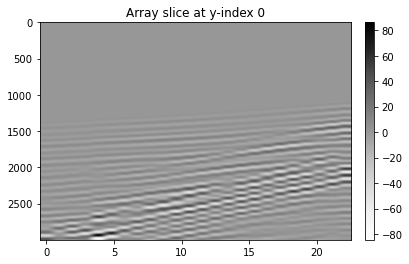

In [48]:
data[200][50][4104][5].plot()

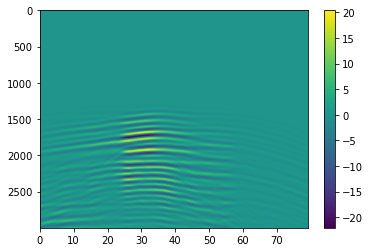

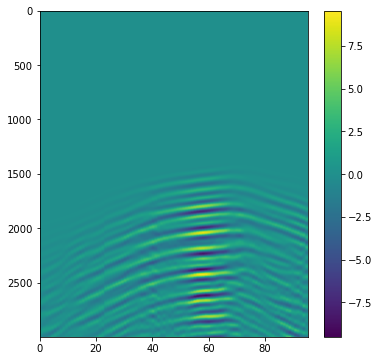

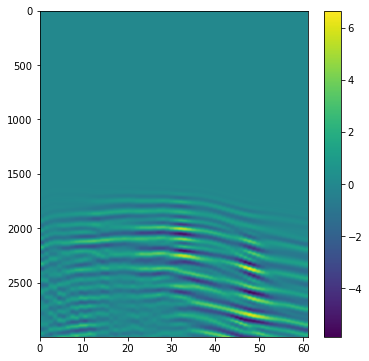

In [75]:
def compare(data, fw1, fw2, rec=4105, line=9, ampl=50):
    from arrau.a2d import Arr2d
    A = Arr2d(data[fw1][ampl][rec][line][:,0,:] - data[fw2][ampl][rec][line][:,0,:])
    A.plot(aspect='auto')
    return A
compare(data, 200, 1400, line=8)
plt.gca().invert_yaxis()
figure()
compare(data, 200, 1400, line=9)
plt.gca().invert_yaxis()
figure()
compare(data, 200, 1400, line=10)
plt.gca().invert_yaxis()

# Synthetics 
Compare start vs. most feasible spike

In [89]:
from fullwavepy.seismic.data import Data #Gather
for obsid in OBS_ids:
    for lid in shot_line_ids:
        a1 = Data(ds01[obsid][lid])
        a2 = Data(data[800][50][obsid][lid])
#         a1.normalise()
#         a2.normalise()
#         il = DataGather(a1.interlace(a2.arr))
#         figure(10,6)
#         il.plot(aspect='auto', label='amplitude, normalised')
#         plt.gca().invert_yaxis()
        #chunk_size = 10
        #ti = np.arange(len(il.arr))[::chunk_size] - .5   
        break
    break

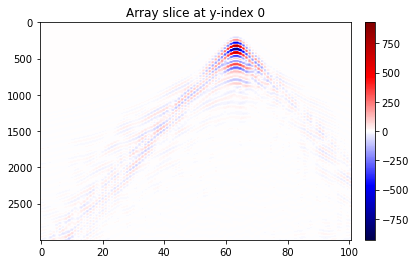

In [94]:
a1.plot()

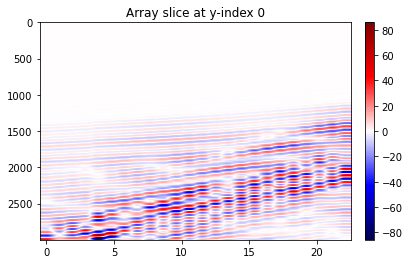

In [95]:
a2.plot()

In [93]:
a1.shape, a2.shape

((102, 1, 3000), (24, 1, 3000))

In [91]:
a1.compare(a2)

ValueError: Arrays must have same shapes.

In [ ]:
a1.normalise()
a2.normalise()
il = DataGather(a1.interlace(a2.arr))
il.axes[1].extent = [0,7.5]

figure(10,6)
il.plot(aspect='auto', label='amplitude, normalised')
plt.gca().invert_yaxis()
chunk_size = 10
ti = np.arange(len(il.arr))[::chunk_size] - .5     
ax = plt.gca()
ax.set_title('aldfj')
ax.set_xticks(ti)
ax.grid(axis='x', c='k', linestyle='-.', linewidth=1)  
empty_string_labels = ['']*len(ti)
ax.set_ylabel('time, s')
_ = ax.set_xticklabels(empty_string_labels)

# ...